<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Phyton_kriging: Fitting 2D variogram </font>
</div>

- **Fecha**: 2023/06/27
        
- **Objetivos**: fitting to all the stored variograms

- **Descripción** Tutorial for determining how it works

- **Referencias**: -

- **Autores**: 
    - Luis Miguel Sánchez Brea

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.dpi'] = 100

In [18]:
from phyton_kriging import np, plt

from phyton_kriging.variogram_2D import theoretical, experimental, fitting
from phyton_kriging.variogram_2D import variogram_types, print_types
from phyton_kriging.standard_2D import kriging2D

## Experimental function 

In [11]:
def f_signal(x, y, width=(1,2), sc=0, I0=0, kind=0):
    """Simulation of data

    Args:
        x (np.array): x_positions
        y (np.array): y_positions
        width (float,float): width of gauss function
        sc (float or np.array): random noise
        I0 (float or np.array): de, variogram_types, print_typestector precision

    Returns:
        y (np.array): data.
    """
    

    match kind:
        case 0:
            z = x + y
        case 1:
            z = np.sin(2 * np.pi * x /width[0]) * np.sin(2 * np.pi * y / width[1]) + x + 0.25*y
        case 2:
            z = np.sin(2 * np.pi * x / 0.5)
        case 3:
            z = 5*np.exp(-(x**2/(2*width[0]**2) + y**2/(2*width[1]**2)))
        case 4:
            z = np.cos(2 * np.pi * np.sqrt(x**2+y**2) / 1) 

    print(z.shape)

    z = z + sc * np.random.randn(*z.shape)
    z = z + 2 * I0 * (np.random.rand(*z.shape) - 0.5)

    return z

In [12]:
sc = .05
I0 = .0001
width = (2, 1)

kind = 1

num_x = num_y = 50
num_sensors = num_x * num_y

sensors = np.zeros((num_sensors, 4), dtype=float)
positions = np.zeros((num_sensors, 2), dtype=float)

x = -5 + 10 * np.random.rand(num_sensors)
y = -5 + 10 * np.random.rand(num_sensors)

x = np.linspace(-2, 2, num_x)
y = np.linspace(-2, 0, num_y)

X, Y = np.meshgrid(x, y)
x = X.flatten()
y = Y.flatten()

sensors[:, 0] = x
sensors[:, 1] = y
sensors[:, 2] = f_signal(x, y, width, sc, I0, kind=kind)
sensors[:, 3] = I0 * np.ones_like(x)

positions = np.zeros((num_sensors, 2), dtype=float)

positions[:, 0] = x
positions[:, 1] = y

(2500,)


(50, 50)


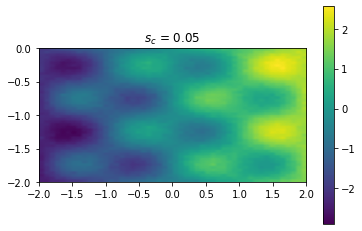

In [13]:
Signal = f_signal(X, Y, width=width, sc=sc, I0=I0, kind=kind)

plt.figure
plt.imshow(Signal, origin='lower', extent=[x[0], x[-1], y[0], y[-1]])

plt.title("$s_c$ = {:2.2f}".format(sc))
plt.colorbar()

## Variogram experimental

In [14]:
hx_var = np.linspace(0, 4, 21)
hy_var = np.linspace(0, 2, 15)

print(hx_var)
print(hy_var)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4. ]
[0.     0.1429 0.2857 0.4286 0.5714 0.7143 0.8571 1.     1.1429 1.2857
 1.4286 1.5714 1.7143 1.8571 2.    ]


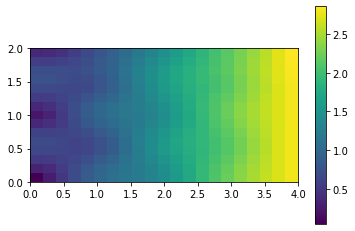

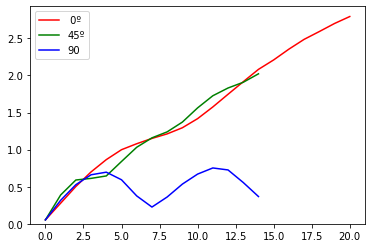

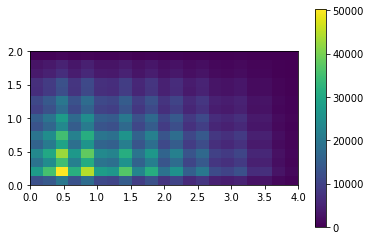

In [20]:
var_exp = experimental(sensors=sensors)
variogram, num_data = var_exp.compute(hx_var,
                                      hy_var,
                                      remove_origin=True,
                                      has_draw=True)


# Optimizacion por PSO

In [22]:
tipos = print_types()

constant
gauss
exponential
spherical
cubic
potential


In [23]:
 fitting_2d = fitting(type='gauss', var_exp=var_exp)
cost, var_final, optimizer = fitting_2d.execute()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [19]:
tipos = print_types()

constant
gauss
exponential
spherical
cubic
potential


In [ ]:
variogramas=[]
cost_values = np.zeros(len(tipos))

i_fitting_best = 0
cost_best=1e10

for i, tipo in enumerate(tipos):
    print(tipo)
    fitting1 = fitting(type=tipo, var_exp=var_exp)
    cost, var_final, optimizer = fitting1.execute()
    cost_values[i] = cost
    variogramas.append(fitting1.var_theo)

    if cost<cost_best:
        cost_best = cost
        i_fitting_best = i
        variogram_best = fitting1

    print(fitting1.cost)

2023-06-27 11:48:02,883 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}


constant


pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.641
2023-06-27 11:48:04,770 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6412940665514129, best pos: [ 1.1626  4.9701 11.2293]
2023-06-27 11:48:04,783 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}


0.6412940665514129
gauss


pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.0157
2023-06-27 11:48:06,735 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.01572789234958292, best pos: [0.5229 1.8388 2.3438]
2023-06-27 11:48:06,745 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}


0.01572789234958292
exponential


pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.0775
2023-06-27 11:48:08,807 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.07748326578867712, best pos: [0.0684 3.1626 4.0537]
2023-06-27 11:48:08,816 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}


0.07748326578867712
spherical


pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.0519
2023-06-27 11:48:11,574 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.05189957761663293, best pos: [0.2076 2.073  4.9282]
2023-06-27 11:48:11,584 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.6, 'w': 0.9}


0.05189957761663293
cubic


pyswarms.single.global_best: 100%|██████████|200/200, best_cost=0.0187
2023-06-27 11:48:14,971 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.018659686895577128, best pos: [0.5132 1.8166 5.5092]


0.018659686895577128


In [ ]:
print(cost_values)

[0.6413 0.0157 0.0775 0.0519 0.0187]


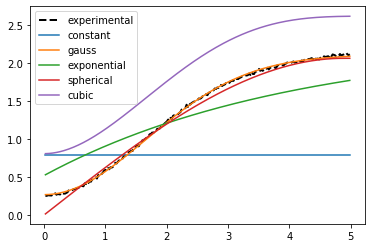

In [ ]:
plt.plot(var_exp.h, var_exp.variogram, 'k--', lw=2, label='experimental')

for v in variogramas:
    h = v.h
    var = v.variogram
    plt.plot(v.h, v.variogram, label=v.type)

plt.legend()

In [ ]:
print(cost_values)

[0.6413 0.0157 0.0775 0.0519 0.0187]


In [ ]:
print(cost_best)
print(i_fitting_best)
print(variogram_best)


0.01572789234958292
1


In [ ]:
print(variogram_best.param_final)
print(variogram_best.params_dict)

[0.5229 1.8388 2.3438]
{'sc': 0.522901682536604, 'A': 1.838793847754693, 'lc': 2.3438285843267477, 'power': 2.0}


In [ ]:
print(variogram_best.type_variogram)

gauss


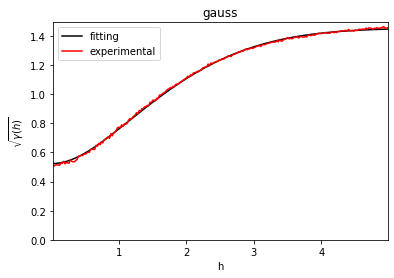

In [ ]:
variogram_best.draw_fitting()
plt.title(variogram_best.type_variogram)

In [ ]:
print(var_final)

[0.5132 1.8166 5.5092 2.    ]


In [ ]:
for i in fitting1.pso_params:
    print("{}: {}".format(i, fitting1.pso_params[i]))

bounds: (array([0, 0, 0]), array([ 2,  5, 20]))
options: {'c1': 0.5, 'c2': 0.6, 'w': 0.9}
num_transitions: 3
num_iters: 200
num_particles: 100
